In [1]:
x=1
y=2
z=x+y
println("x+y=$z")

x+y=3



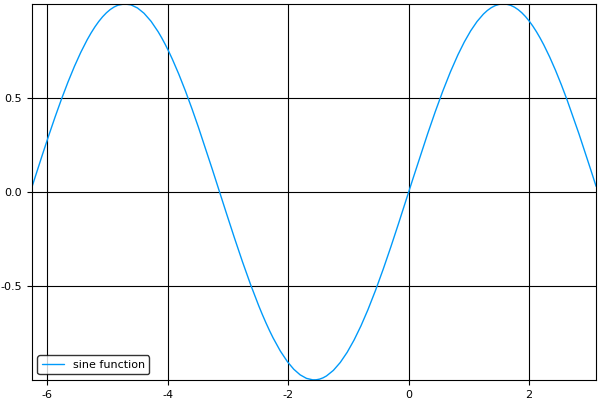

In [2]:
using Plots
plot(sin, -2pi,pi,label="sine function") 

In [3]:
?repmat

search: repmat



```
repmat(A, n, m)
```

Construct a matrix by repeating the given matrix `n` times in dimension 1 and `m` times in dimension 2.


Practice writing in markdown.

In [4]:
using QuantEcon: tauchen
tauchen(4,0.9,1.0)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
[0.945853 0.0541468 2.92863e-10 0.0; 0.00580845 0.974718 0.0194737 1.43534e-11; 1.43534e-11 0.0194737 0.974718 0.00580845; 2.08117e-27 2.92863e-10 0.0541468 0.945853]


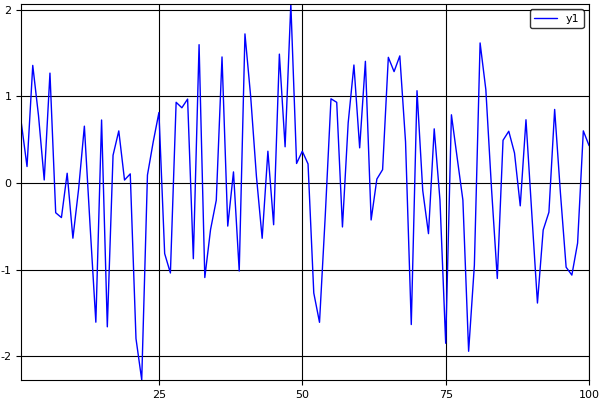

In [5]:
using Plots # make all names exported by Plots available
ts_length=100
epsilon_values=randn(ts_length)
plot(epsilon_values,color="blue")

In [6]:
typeof(epsilon_values)

Array{Float64,1}

Exercise 1: Write your own version of n! in Julia, using a for loop

In [7]:
function factorial2(n)
    out=1
    for i=1:n 
        out=out*i
    end
    return out
end

fact5=factorial2(4)

24

Exercise 2: Using only rand() write a function binomial_rv s.t. binomial_rv(n,p) generates one draw of Y where Y is a binomial r.v.

In [8]:
function binomial_rv(n::Int,p::Float64)
    # p is the probability that we get a success
    out=0 # start off at zero successes
    U=rand(n) # draw all the random numbers at once, outside of the loop
    for ii=1:n
        if U[ii]<p #success
            out=out+1
        end
    end
    return out
end

binomial_rv (generic function with 1 method)

In [9]:
b=binomial_rv(10,0.5)

7

Exercise 4:  

Write a program that prints one realization of the following random device:

Flip an unbiased coin 10 times
If 3 consecutive heads occur one or more times within this sequence, pay one dollar
If not, pay nothing
Once again use only rand() as your random number generator

In [10]:
function random_coin()
    out=0 # initial amount to be paid
    # do the random generation outside of the for loop
    outcome=rand(10)
    coin_vec=zeros(10)
    # heads is getting <0.5
    for i=1:10
        if outcome[i]<0.5
            coin_vec[i]=1
        end
        
    end
    
    for i=2:9
        if coin_vec[i]==1 && coin_vec[i-1]==1 && coin_vec[i+1]==1
            out=1
            break
        end
    end
    return out
end

random_coin (generic function with 1 method)

In [11]:
x=random_coin()

1

Exercise 5
Simulate and plot an AR(1) with persistence =0.9 and standard normal errors for T=200 periods


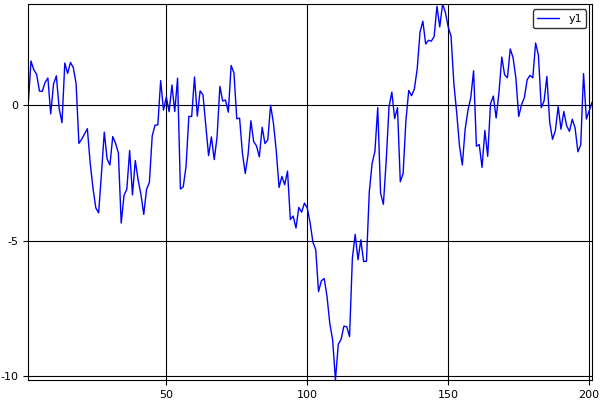

In [12]:
alpha=0.9
T=200

function AR1_simul(T::Int, alpha::Float64)
    x=zeros(T+1)
    for ii=1:T
        x[ii+1]=alpha*x[ii]+randn()
    end
    return x
end

x=AR1_simul(200,0.9)
plot(x, color="blue")

Exercise 6: Plot three simulated time series, one for each of the cases α=0α=0, α=0.8α=0.8 and α=0.98α=0.98

In particular, you should produce (modulo randomness) a figure that looks as follows

In [13]:
alphavec=[0.0,0.8,0.98]
T=200
T_vec=linspace(1,200,200)
using PyPlot
function AR1_simul(T::Int, alpha)
    x1=zeros(T+1)
    x2=zeros(T+1)
    x3=zeros(T+1)
    for ii=1:T
        x1[ii+1]=alpha[1]*x1[ii]+randn()
        x2[ii+1]=alpha[2]*x2[ii]+randn()
        x3[ii+1]=alpha[3]*x3[ii]+randn()
    end
    return x1,x2,x3
end

x1,x2,x3=AR1_simul(T,alphavec)


([0.0,-0.788617,0.028256,-0.0497575,-0.166664,0.784616,0.202191,-0.370014,0.401718,-0.976958  …  -1.50954,-1.36151,-0.657644,-0.357317,-0.844748,0.236776,-0.0343608,0.781181,0.876071,0.717326],[0.0,0.441121,-0.345294,0.287241,3.96808,3.74838,3.45531,1.76895,0.7516,1.69392  …  -0.502596,-0.377154,-0.262225,0.453989,-0.217139,0.306263,-0.379112,-0.891401,-1.03424,-1.11992],[0.0,-1.75352,-1.77631,-0.916174,-2.60004,-3.43353,-6.85629,-6.5718,-5.0541,-4.43865  …  0.842672,1.5705,2.48807,3.2271,4.10659,4.98078,4.54125,2.49214,3.08296,2.82472])


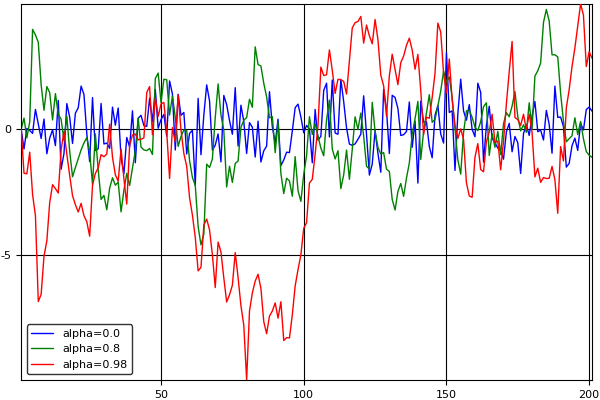

In [14]:

#plot 1st
plot(x1,label="alpha=0.0", color="blue")
# plot 2nd
plot!(x2,label="alpha=0.8", color="green" )
plot!(x3,label="alpha=0.98", color="red" )
